#### Artem Golotin
CS501R Lab 4

In [1]:
from pdb import set_trace as debugger
from tqdm import tqdm
from math import log, exp
import autograd.numpy as np
from autograd import grad

def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T

N = 1000
D = 3072
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

W = np.random.randn(10, D)
step_size = 0.1

def accuracy(_w):
    predictions = np.argmax(np.dot(features, _w.T), axis=1).reshape(N, 1)
    return ((predictions == labels).sum()) / float(N)

def softmax_loss_function(_w):
    scores = np.dot(features, _w.T)
    prob = scores[np.arange(N).reshape(N,1), labels]
    return np.mean(-np.log(np.exp(prob) / np.sum(np.exp(scores), axis=1).reshape(N, 1)))

# Define gradient function
grad_f = grad(softmax_loss_function)

total_losses = []
total_accuracy = []
for epoch in tqdm(xrange(2000)):
    # Calculate the gradient
    gradient = grad_f(W)
    # Update weights
    W += -step_size * gradient
    # Calculate loss
    loss = softmax_loss_function(W)
    # Save loss to graph later
    total_losses.append(loss)
    # Calculate accuracy
    total_accuracy.append(accuracy(W))

100%|██████████| 2000/2000 [02:09<00:00, 16.46it/s]


In [2]:
import matplotlib.pyplot as plt

def plot_loss():
    x = range(1,2001)
    plt.plot(x, total_losses)
    plt.ylabel("Cost Function (softmax)")
    plt.xlabel("Epoch")
    plt.show()
    
def plot_accuracy():
    x = range(1,2001)
    plt.plot(x, total_accuracy)
    plt.ylabel("Classification Accuracy (%)")
    plt.xlabel("Epoch")
    plt.show()


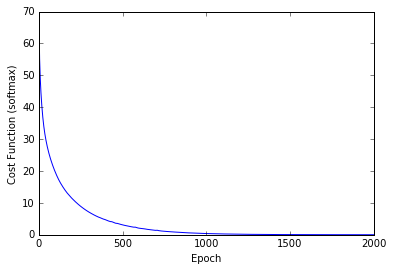

In [3]:
%matplotlib inline
plot_loss()

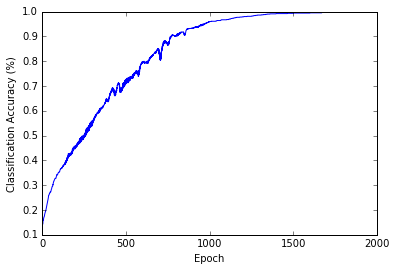

In [4]:
%matplotlib inline
plot_accuracy()